In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
import seaborn as sns

In [3]:
warnings.filterwarnings('ignore')

In [4]:
homes=pd.read_csv('C:\\UpGrad\\Model Selection\\Assignment Advanced Regression\\train.csv')

In [5]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- We can see that their are 1460 rows and 81 columns.
- The no of predictor variables is high and the data size is low.

In [6]:
homes.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
homes.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Even though their are ouliers we do not need to do the outlier treatment as the data size is small and even we may miss out important information.Like the some of the housing selling for higher price.

In [8]:
(homes.isna().sum()/len(homes))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

- We drop the columns having missing values> 30% as they will not be able to help in any way,imputing them will introduce biased dataset.
- We imput numerical values with median as their are outliers in the data set.
- We impute the categorical value with max occurance value.

In [9]:
def mapsubclasses(data):
    if data==20:
        return '1-STORY 1946 & NEWER'
    elif data==30:
        return '1-STORY 1945 & OLDER'
    elif data==40:
        return '1-STORY W/FINISHED'
    elif data==45:
        return '1-1/2 STORY - UNFINISHED'
    elif data==50:
        return '1-1/2 STORY FINISHED'
    elif data==60:
        return '2-STORY 1946 & NEWER'
    elif data==70:
        return '2-STORY 1945 & OLDER'
    elif data==75:
        return '2-1/2 STORY ALL AGES'
    elif data==80:
        return 'SPLIT OR MULTI-LEVEL'
    elif data==85:
        return 'SPLIT FOYER'
    elif data==90:
        return 'DUPLEX - ALL STYLES AND AGES'
    elif data==120:
        return '1-STORY PUD'
    elif data==150:
        return '1-1/2 STORY PUD'
    elif data==160:
        return '2-STORY PUD'
    elif data==180:
        return 'PUD-MULTILEVEL-INCL'
    elif data==190:
        return '2 FAMILY CONVERSION'
    
        

- We leave the columns having categorical data represented in the form of numbers if they are in hierarchical order.
- Since MSsubclass values are not in hierarchical order we convert them to categorical variables.

In [10]:
homes['MSSubClass']=homes['MSSubClass'].map(mapsubclasses)

In [11]:
homes.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1,inplace=True)

In [12]:
(homes.isna().sum()/len(homes))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
                   ...    
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
K

In [13]:
homes.drop_duplicates(inplace=True)

- Dropping duplicate rows.

In [14]:
homes.loc[homes['LotFrontage'].isnull(),'LotFrontage']=homes['LotFrontage'].median()

In [15]:
homes['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
homes.loc[homes['MasVnrType'].isnull(),'MasVnrType']='None'

In [17]:
homes['MasVnrArea'].median()

0.0

In [18]:
homes.loc[homes['MasVnrArea'].isnull(),'MasVnrArea']=homes['MasVnrArea'].median()

In [19]:
homes['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [20]:
homes.loc[homes['BsmtQual'].isnull(),'BsmtQual']='TA'

In [21]:
homes['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [22]:
homes.loc[homes['BsmtCond'].isnull(),'BsmtCond']='TA'

In [23]:
homes['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [24]:
homes.loc[homes['BsmtExposure'].isnull(),'BsmtExposure']='No'

In [25]:
homes['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [26]:
homes.loc[homes['BsmtFinType1'].isnull(),'BsmtFinType1']='Unf'

In [27]:
homes['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [28]:
homes.loc[homes['BsmtFinType2'].isnull(),'BsmtFinType2']='Unf'

In [29]:
homes['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [30]:
homes.loc[homes['Electrical'].isnull(),'Electrical']='SBrkr'

In [31]:
homes['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [32]:
homes.loc[homes['GarageType'].isnull(),'GarageType']='Attchd'

In [33]:
homes['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [34]:
homes.loc[homes['GarageFinish'].isnull(),'GarageFinish']='Unf'

<h4>Since we cannot treate years as normal numerical value we create seperate column like age of the house etc.</h4>
<h4>Months do not contribute in explaining sale price,So we drop those columns.</h4>

In [35]:
homes['GarageYrBlt'].astype('category').value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1958.0    21
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1957.0    20
1970.0    20
1996.0    20
2001.0    20
1978.0    19
1954.0    19
1997.0    19
1960.0    19
1994.0    18
1964.0    18
          ..
1916.0     5
1936.0     5
1922.0     5
1945.0     4
1946.0     4
1935.0     4
1982.0     4
1931.0     4
1928.0     4
1910.0     3
1921.0     3
1923.0     3
1924.0     3
2010.0     3
1932.0     3
1938.0     3
1952.0     3
1929.0     2
1934.0     2
1937.0     2
1942.0     2
1918.0     2
1947.0     2
1915.0     2
1914.0     2
1927.0     1
1933.0     1
1908.0     1
1906.0     1
1900.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [36]:
homes.loc[homes['GarageYrBlt'].isnull(),'GarageYrBlt']=2005

In [37]:
homes['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [38]:
homes.loc[homes['GarageQual'].isnull(),'GarageQual']='TA'

In [39]:
homes['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [40]:
homes.loc[homes['GarageCond'].isnull(),'GarageCond']='TA'

In [41]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [42]:
homes.drop(['MoSold','YrSold'],inplace=True,axis=1)

In [43]:
homes['HomeAge']=2019-homes['YearBuilt']

In [44]:
homes['YearsSinceRemod']=2019-homes['YearRemodAdd']

In [45]:
homes['GarageAge']=2019-homes['GarageYrBlt']

- We take the current year to compute the age of house or garage.

In [46]:
homes.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

In [47]:
homes.drop('Id',axis=1,inplace=True)

In [48]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass         1460 non-null object
MSZoning           1460 non-null object
LotFrontage        1460 non-null float64
LotArea            1460 non-null int64
Street             1460 non-null object
LotShape           1460 non-null object
LandContour        1460 non-null object
Utilities          1460 non-null object
LotConfig          1460 non-null object
LandSlope          1460 non-null object
Neighborhood       1460 non-null object
Condition1         1460 non-null object
Condition2         1460 non-null object
BldgType           1460 non-null object
HouseStyle         1460 non-null object
OverallQual        1460 non-null int64
OverallCond        1460 non-null int64
RoofStyle          1460 non-null object
RoofMatl           1460 non-null object
Exterior1st        1460 non-null object
Exterior2nd        1460 non-null object
MasVnrType         1460 non-null object
MasVnrArea     

- None of the columns have missing values now,we can start with anlysis.

In [49]:
np.unique(homes['CentralAir'])

array(['N', 'Y'], dtype=object)

In [50]:
homes['CentralAir']=homes['CentralAir'].map(lambda x:1 if x=='Y' else 0)

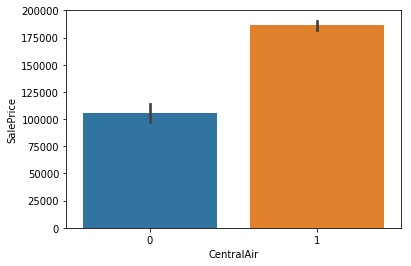

In [51]:
sns.barplot('CentralAir','SalePrice',data=homes)

- We can see from the above plot that homes with central AC have higher sale price compared to not having it.

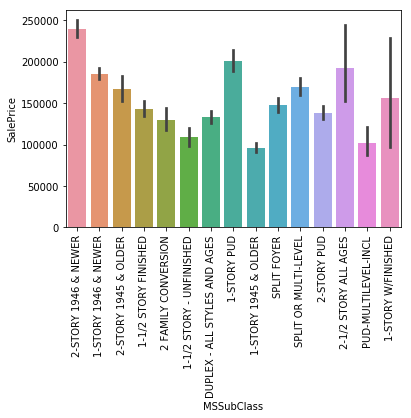

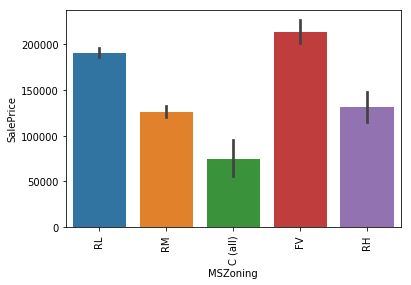

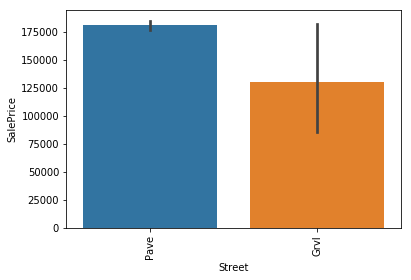

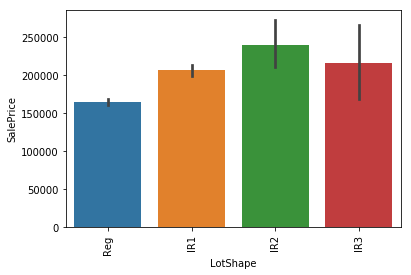

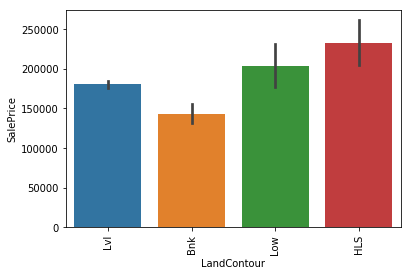

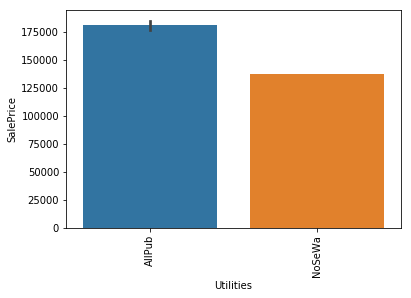

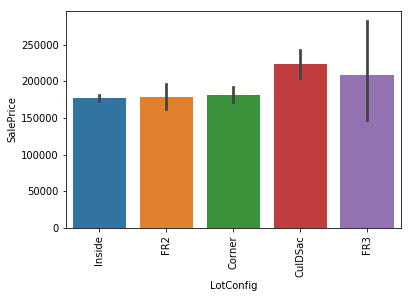

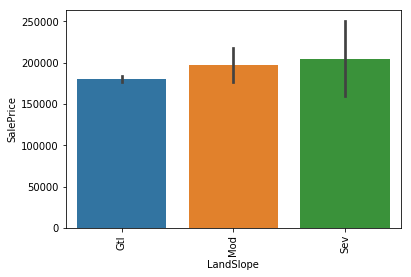

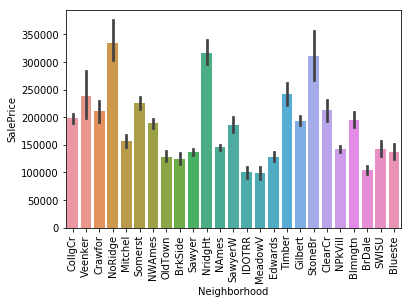

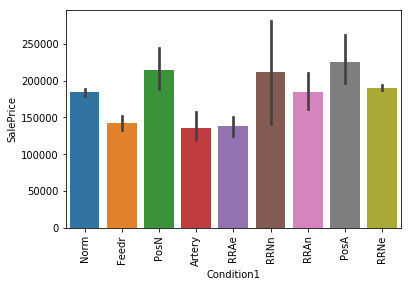

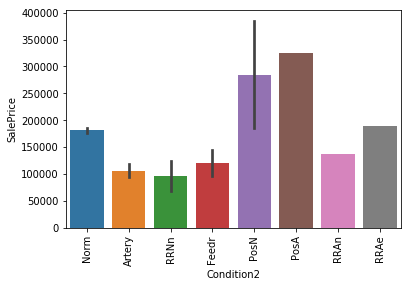

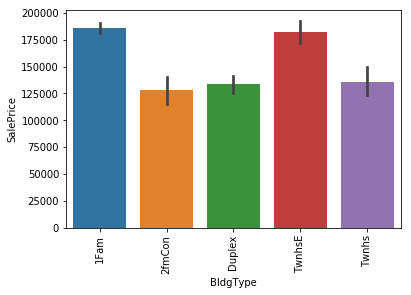

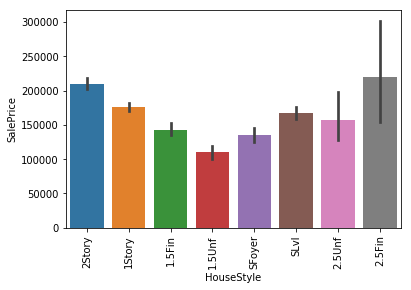

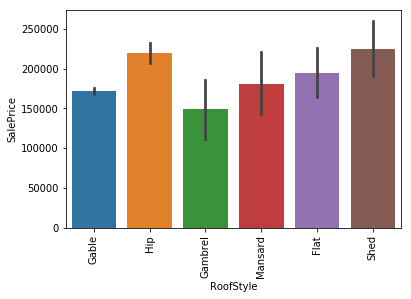

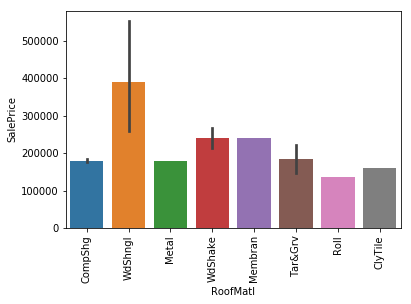

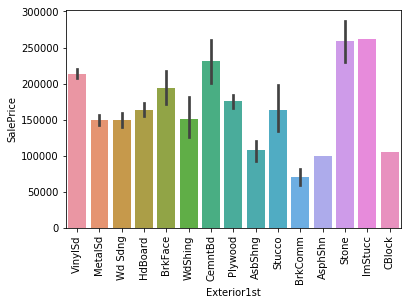

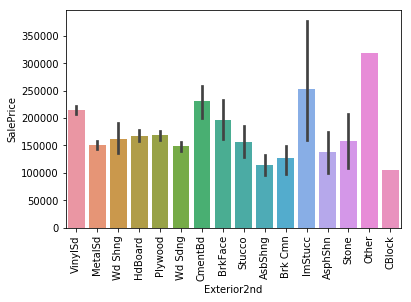

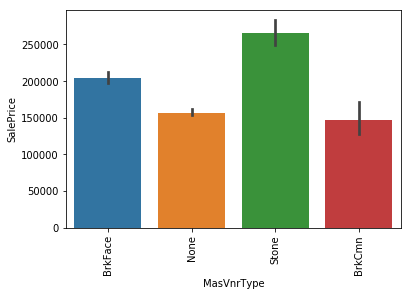

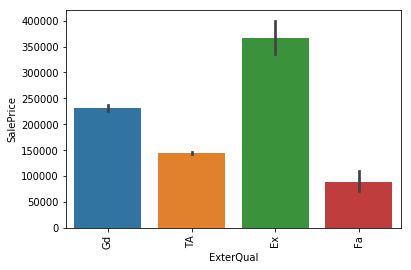

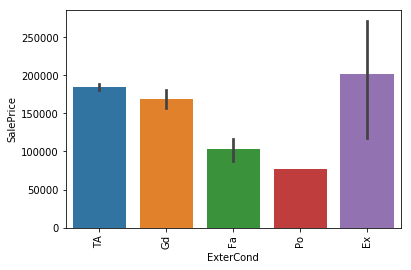

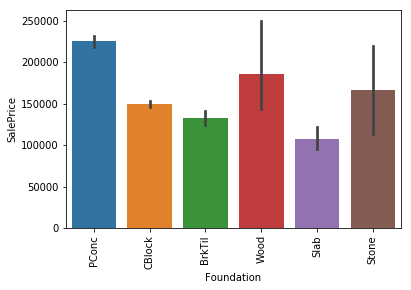

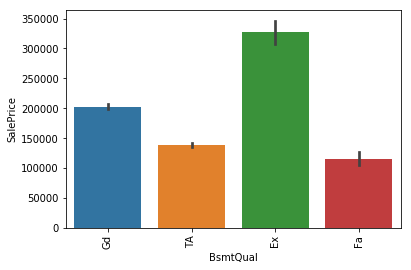

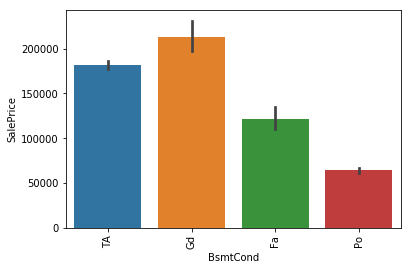

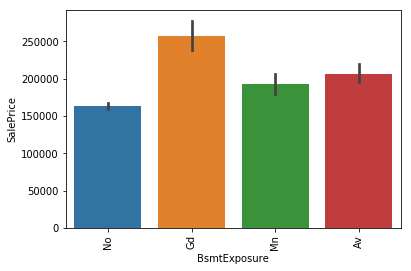

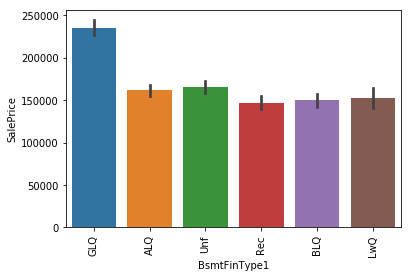

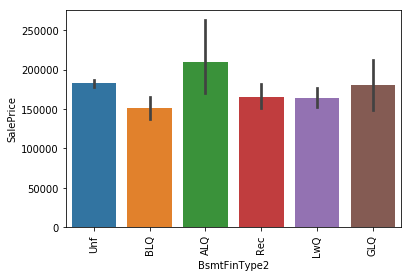

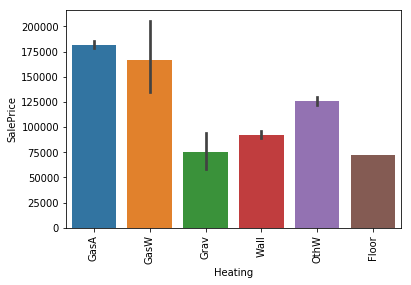

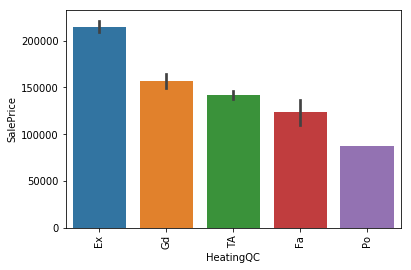

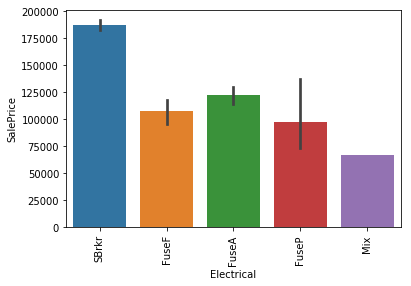

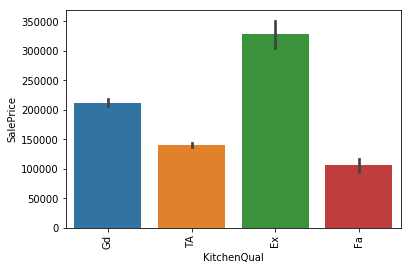

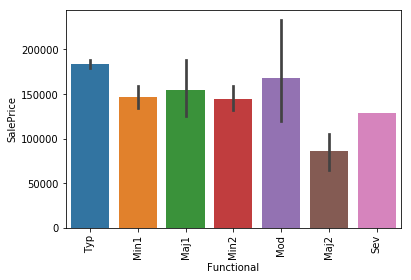

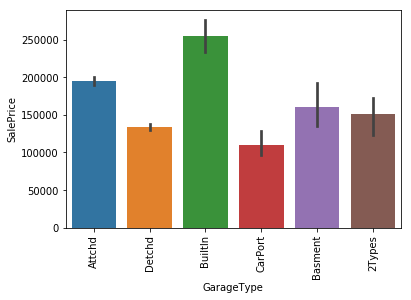

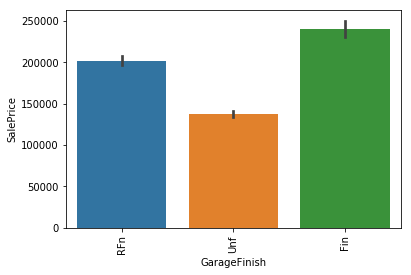

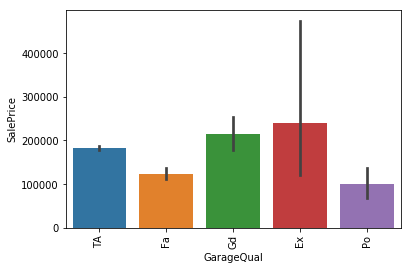

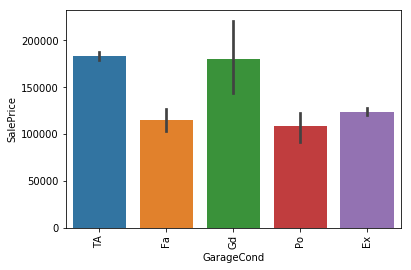

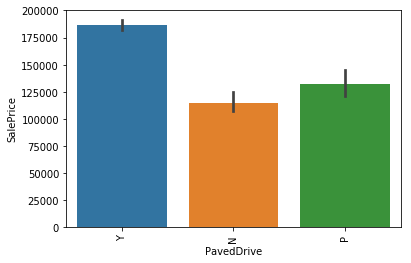

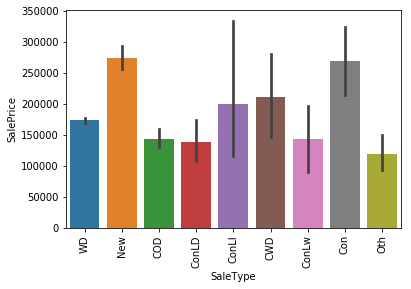

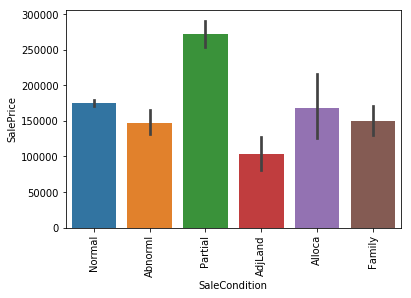

In [52]:
for i in homes.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(i,'SalePrice',data=homes)
    plt.xticks(rotation=90)
    plt.show()

<h4>We can see from the above how the categorical variables affect the sale price of the house.</h4>

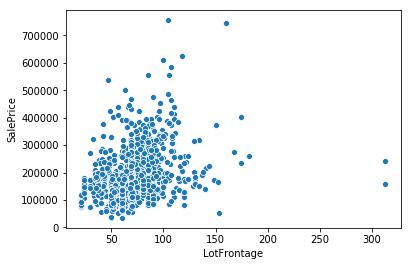

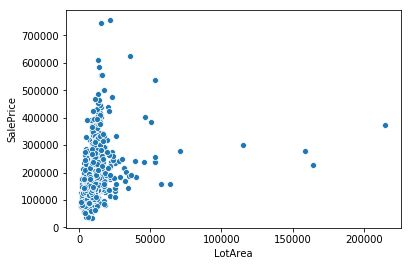

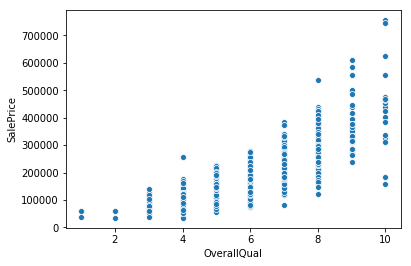

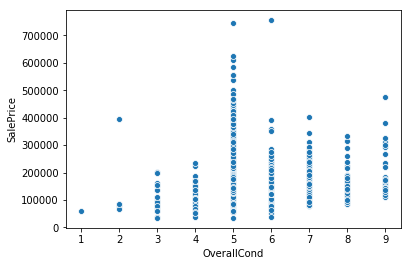

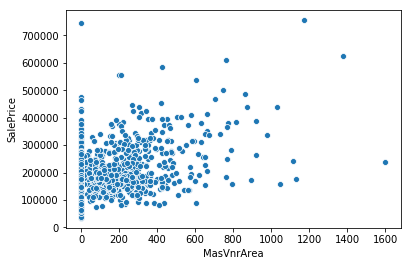

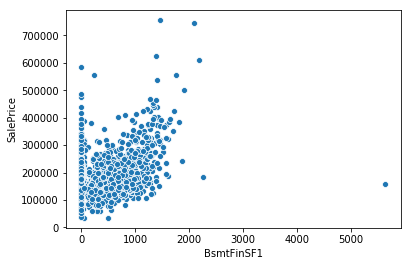

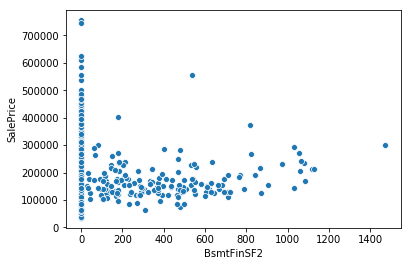

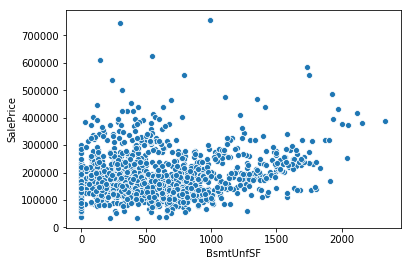

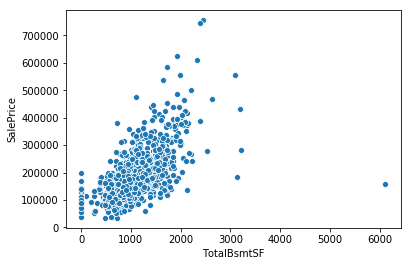

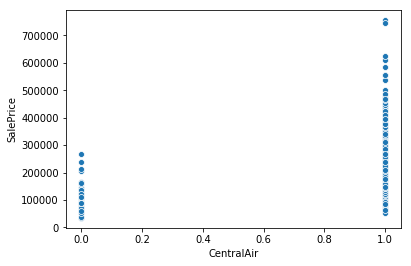

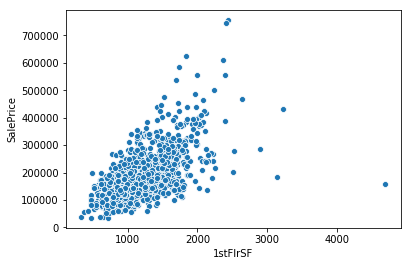

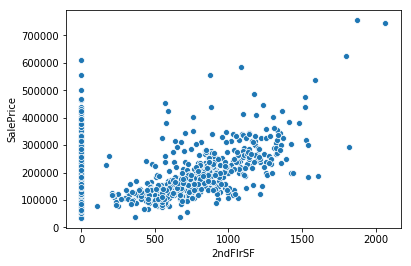

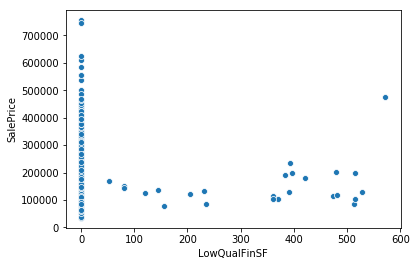

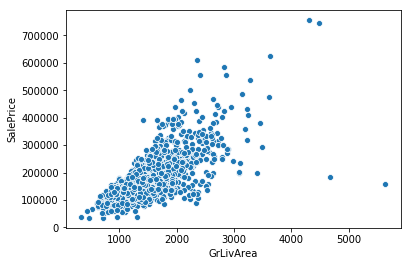

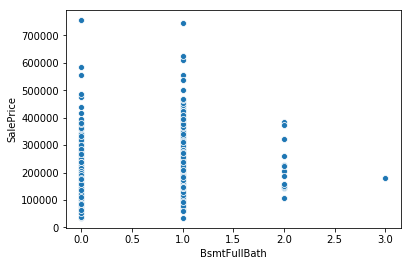

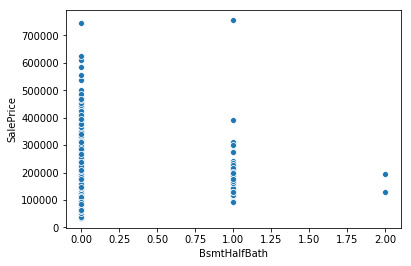

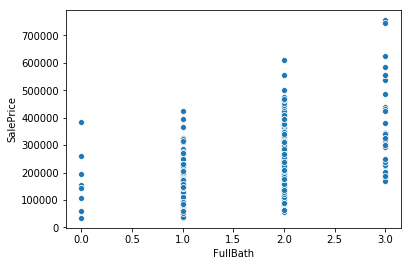

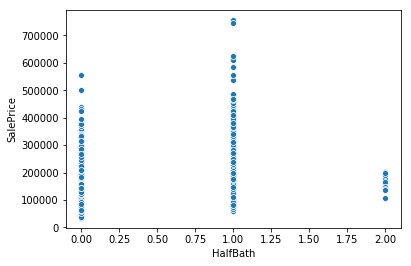

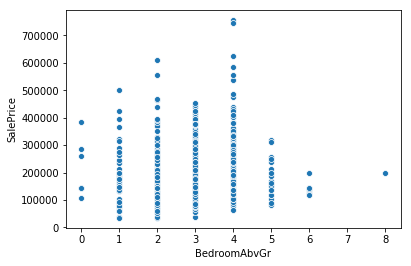

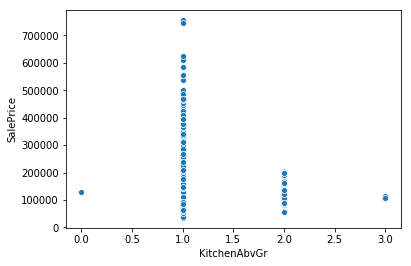

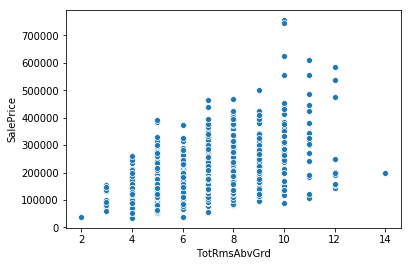

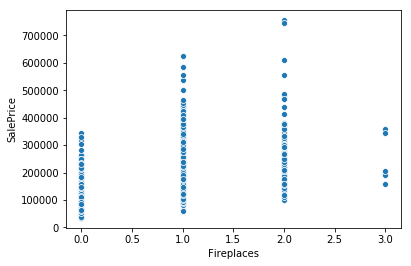

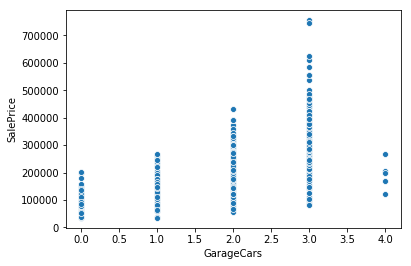

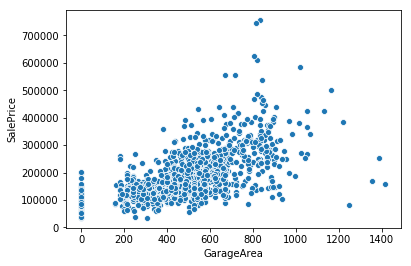

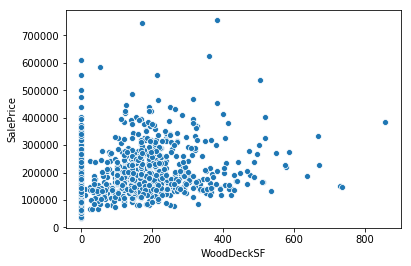

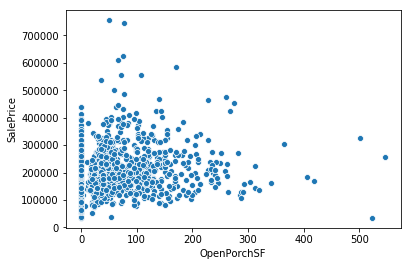

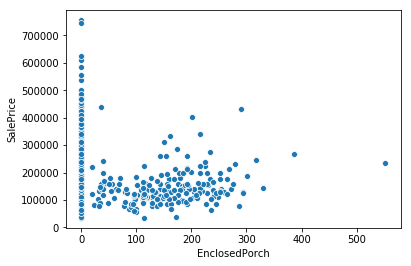

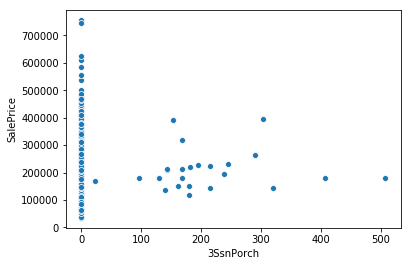

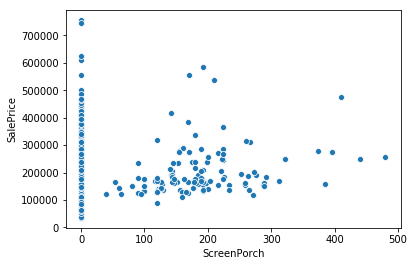

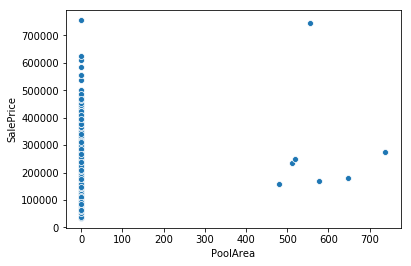

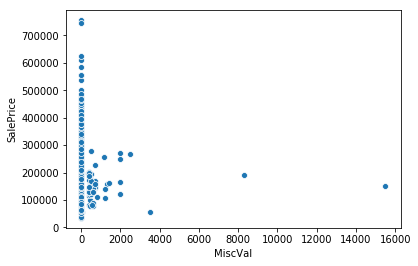

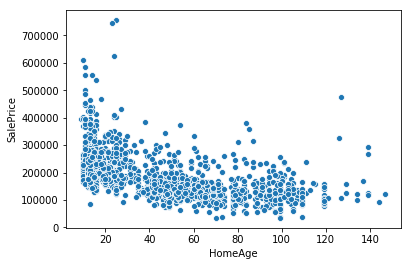

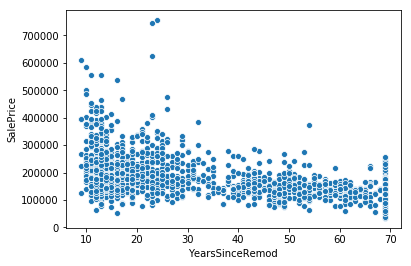

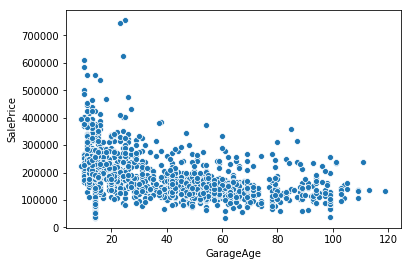

In [53]:
for i in homes.select_dtypes(include=['int64','float64']).columns:
    if i!='SalePrice':
        plt.figure()
        sns.scatterplot(i,'SalePrice',data=homes)
        plt.show()

- We can see how the data is distributed for numerical variables and how it is affecting the sale price from the above graphs.

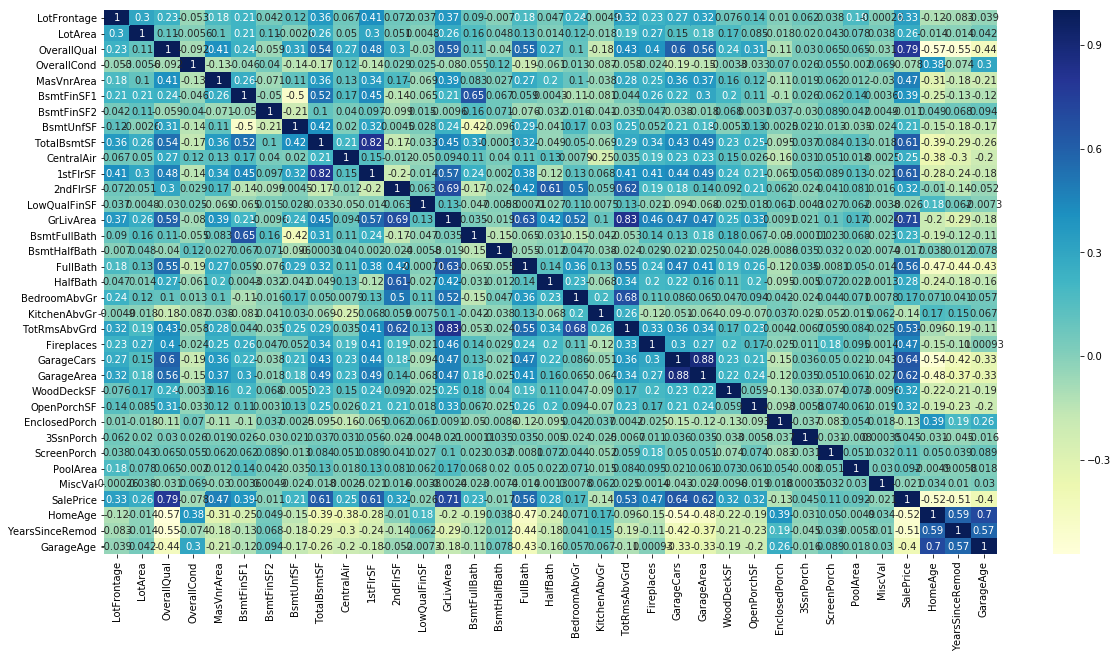

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(homes.corr(),annot=True,cmap='YlGnBu')

- We see that their are multiple variable which are colinier to each other.

<h4>We create dummy values and standardize the data and then continue with further anlysis.</h4>

In [55]:
homes_dummy=pd.get_dummies(homes,drop_first=True)

In [56]:
homes_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 244 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(32), uint8(209)
memory usage: 748.6 KB


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
std=StandardScaler()

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
y=homes_dummy.pop('SalePrice')
acols=homes_dummy.select_dtypes(include=['float64','int64']).columns
X=pd.DataFrame(std.fit_transform(homes_dummy[acols]),columns=acols)

In [62]:
homes_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 243 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(31), uint8(209)
memory usage: 737.2 KB


In [63]:
X=pd.concat([X,homes_dummy[homes_dummy.select_dtypes(include=['uint8']).columns]],axis=1)

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

- Splitting the data so that we can train on some part of data and test on some other part,So we can create a better model else it will memorize the datapoints.

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Columns: 243 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(34), uint8(209)
memory usage: 487.6 KB


In [66]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV

In [67]:
from sklearn.metrics import r2_score

In [68]:
from sklearn.model_selection import GridSearchCV,KFold

In [69]:
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [71]:
lr=LinearRegression()
#lr.fit(X_train,y_train)
rfe=RFE(estimator=lr,n_features_to_select=100)

In [72]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=100, step=1, verbose=0)

- Since their are lotmany variables,it is not possible to pick we use the automated feature selection like RFE to pick the top 100 non correlated features.

In [73]:
rfe_cols=X_train.columns[rfe.support_]

In [75]:
lm = LinearRegression()
lm.fit(X_train[rfe_cols], y_train)

# predict
y_train_pred = lm.predict(X_train[rfe_cols])
print(r2_score(y_true=y_train, y_pred=y_train_pred))


0.916259421749731


In [76]:
y_test_pred = lm.predict(X_test[rfe_cols])
print(r2_score(y_true=y_test, y_pred=y_test_pred))

-1.819033521306672e+20


<h4>We can clearly see from the above output linear model is able to explain 91.6% of the data on training set but when applied on test set the r2 score is in negative. Which is a clear indication of overfit.</h4>
<h4>In order to solve this we go for regularization, we do both lasso and ridge regularization and choose the best among the two.</h4>

In [77]:
X_train_lasso=X_train[rfe_cols].copy()
y_train_lasso=y_train.copy()
X_test_lasso=X_test[rfe_cols].copy()
y_test_lasso=y_test.copy()

- We need to find the suitable hyperparameter which minimizes the error for which we choose list of alphas and see the r2 score by plotting the outputs and choose the best one.

In [78]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

folds=KFold(n_splits=5,random_state=10,shuffle=True)

lsm=Lasso()

modelgrid1=GridSearchCV(cv=folds,estimator=lsm,scoring='r2',param_grid=params,return_train_score=True,verbose=1)

In [79]:
modelgrid1.fit(X_train[rfe_cols],y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [80]:
lsm_cv=pd.DataFrame(modelgrid1.cv_results_)

In [81]:
lsm_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073803,0.004231,0.000598,0.000489,0.0001,{'alpha': 0.0001},0.146273,0.553465,0.908181,0.506701,...,0.605184,0.286531,28,0.934836,0.933379,0.933657,0.936464,0.93159,0.933986,0.001617
1,0.072805,0.005007,0.000799,0.000399,0.001,{'alpha': 0.001},0.146286,0.553691,0.908182,0.506710,...,0.605234,0.286518,27,0.934836,0.933379,0.933657,0.936464,0.93159,0.933986,0.001617
2,0.065823,0.003990,0.000599,0.000489,0.01,{'alpha': 0.01},0.146416,0.555495,0.908182,0.506807,...,0.605640,0.286407,26,0.934836,0.933379,0.933657,0.936464,0.93159,0.933986,0.001617
3,0.065424,0.005030,0.000798,0.000399,0.05,{'alpha': 0.05},0.146987,0.555754,0.908186,0.507235,...,0.605897,0.286188,25,0.934836,0.933379,0.933657,0.936464,0.93159,0.933985,0.001617
4,0.059440,0.003489,0.000798,0.000399,0.1,{'alpha': 0.1},0.147692,0.556078,0.908191,0.507771,...,0.606215,0.285919,24,0.934836,0.933379,0.933657,0.936464,0.93159,0.933985,0.001617


In [82]:
lsm=Lasso(alpha=1)
lsm.fit(X_train[rfe_cols],y_train)

y_lasso_train_pred=lsm.predict(X_train[rfe_cols])

print(r2_score(y_pred=y_lasso_train_pred,y_true=y_train))

y_lasso_test_pred=lsm.predict(X_test[rfe_cols])

print(r2_score(y_pred=y_lasso_test_pred,y_true=y_test))

0.9317900766825739
0.8048644289602002


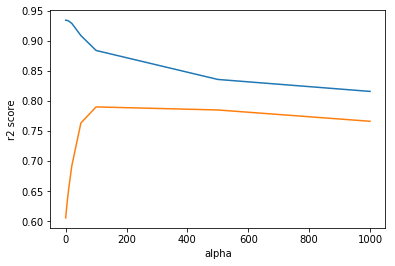

In [83]:
lsm_cv['param_alpha']=lsm_cv['param_alpha'].astype('float32')
plt.plot(lsm_cv['param_alpha'],lsm_cv['mean_train_score'])
plt.plot(lsm_cv['param_alpha'],lsm_cv['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [84]:
lsm=Lasso(alpha=150)
lsm.fit(X_train[rfe_cols],y_train)

y_lasso_train_pred=lsm.predict(X_train[rfe_cols])

print(r2_score(y_pred=y_lasso_train_pred,y_true=y_train))

y_lasso_test_pred=lsm.predict(X_test[rfe_cols])

print(r2_score(y_pred=y_lasso_test_pred,y_true=y_test))

0.8700489770337285
0.8431393309224424


<ul>
    <li><b>We can clearly see from the above graph and output the alpha value suitable for lasso is 150.</b></li>
    <li><b>This is because the test data r2 score is maximum at this point after which it is decreasing slowly.</b></li>
</ul>

In [85]:
model_params=list(lsm.coef_)
model_params.insert(0,lsm.intercept_)
model_params=[round(i,3) for i in model_params]
cols=X_train_lasso.columns
cols=cols.insert(0,'constant')
ftr_n_val=list(zip(cols,model_params))

In [86]:
ftr_n_val[:10]

[('constant', 191960.709),
 ('LotArea', 3940.059),
 ('OverallQual', 18927.096),
 ('OverallCond', 5137.921),
 ('BsmtFinSF1', 4300.321),
 ('BsmtFinSF2', 1347.997),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 443.302),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0)]

In [87]:
sel_cols=[i for i,j in ftr_n_val if j!=0]
sel_cols.pop(0)

'constant'

- <b>Since Lasso regression moves correlated variable to 0 and chooses one among the group whose values will not be zero.This helps in feature selection.</b>
- <b>This we select non zero variable column as the features from model building.</b>

In [88]:
sel_cols

['LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'GarageCars',
 'GarageAge',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER',
 'MSSubClass_2 FAMILY CONVERSION',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR2',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Mitchel',
 'Neighborhood_NoRidge',
 'Neighborhood_Somerst',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition2_Norm',
 'Condition2_PosN',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'RoofMatl_CompShg',
 'RoofMatl_WdShngl',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_CmentBd',
 'Exterior2nd_VinylSd',
 'ExterQual_TA',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Typ',
 'GarageQual_Fa',
 'GarageCond_TA',
 'SaleType_New']

- <b>Since their are too many variables,we again use RFE to choose top 15 features which we can report back.</b>

In [89]:
rfe2=RFE(estimator=lm,n_features_to_select=15)
rfe2.fit(X_train[sel_cols],y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [90]:
list(zip(X_train[sel_cols].columns,rfe2.support_,rfe2.ranking_))

[('LotArea', False, 23),
 ('OverallQual', True, 1),
 ('OverallCond', False, 22),
 ('BsmtFinSF1', False, 25),
 ('BsmtFinSF2', False, 32),
 ('TotalBsmtSF', False, 33),
 ('LowQualFinSF', False, 29),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 31),
 ('GarageCars', False, 17),
 ('GarageAge', False, 30),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 18),
 ('MSSubClass_1-STORY 1946 & NEWER', True, 1),
 ('MSSubClass_2 FAMILY CONVERSION', False, 20),
 ('MSSubClass_DUPLEX - ALL STYLES AND AGES', False, 5),
 ('MSZoning_RL', False, 3),
 ('MSZoning_RM', False, 27),
 ('LotConfig_FR2', False, 11),
 ('Neighborhood_BrkSide', False, 13),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Mitchel', False, 24),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_Somerst', False, 2),
 ('Neighborhood_Veenker', False, 9),
 ('Condition1_Norm', False, 14),
 ('Condition2_Norm', False, 28),
 ('Condition2_PosN', True, 1),
 ('BldgType_2fmCon', False, 7),
 ('BldgType_Duplex', False, 16),
 ('RoofMatl_CompShg', 

- We build the model using these 15 features and see that adj R2 value is still better.

In [91]:
X_const=sm.add_constant(X_train[X_train[sel_cols].columns[rfe2.support_]])
model=sm.OLS(y_train,X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     359.0
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:58:44   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.407e+04
Df Residuals:                    1005   BIC:                         2.415e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [112]:
X_const=sm.add_constant(X_test[X_test[sel_cols].columns[rfe2.support_]])
model=sm.OLS(y_test,X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          6.53e-152
Time:                        12:14:05   Log-Likelihood:                -5179.2
No. Observations:                 438   AIC:                         1.039e+04
Df Residuals:                     422   BIC:                         1.046e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Above listed variables help in predicting the price of house.
- If we look at the adj R2 value it is able to explain 82.4% of the data.

In [92]:
from sklearn.metrics import mean_squared_error

<h3>For the Ridge regression we follow the similar steps,we use the same alphas and plot the r2 scores.</h3>

In [93]:
rgm=Ridge()

modelgrid2=GridSearchCV(cv=folds,estimator=rgm,scoring='r2',param_grid=params,return_train_score=True,verbose=1)

In [94]:
modelgrid2.fit(X_train[rfe_cols],y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

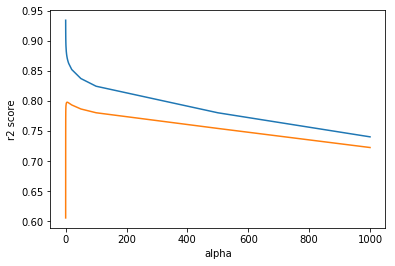

In [95]:
rgm_cv=pd.DataFrame(modelgrid2.cv_results_)

rgm_cv['param_alpha']=rgm_cv['param_alpha'].astype('float32')
plt.plot(rgm_cv['param_alpha'],rgm_cv['mean_train_score'])
plt.plot(rgm_cv['param_alpha'],rgm_cv['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [96]:
X_train_rig=X_train[rfe_cols].copy()
y_train_rig=y_train.copy()
X_test_rig=X_test[rfe_cols].copy()
y_test_rig=y_test

In [97]:
rig=Ridge(alpha=5)
rig.fit(X_train[rfe_cols],y_train)

y_rig_train_pred=rig.predict(X_train[rfe_cols])

print(r2_score(y_pred=y_rig_train_pred,y_true=y_train))

y_rig_test_pred=rig.predict(X_test[rfe_cols])

print(r2_score(y_pred=y_rig_test_pred,y_true=y_test))

0.8671033178484518
0.8511945282765961


In [98]:
rig=Ridge(alpha=15)
rig.fit(X_train[rfe_cols],y_train)

y_rig_train_pred=rig.predict(X_train[rfe_cols])

print(r2_score(y_pred=y_rig_train_pred,y_true=y_train))

y_rig_test_pred=rig.predict(X_test[rfe_cols])

print(r2_score(y_pred=y_rig_test_pred,y_true=y_test))

0.8538156757082409
0.8527503363153162


- We can see from the above graph and output the r2 for train and test is better at alpha=15,this we choose as the alpha value.

In [99]:
rig.coef_

array([  3881.99255114,  20157.03748166,   5083.40817347,   3370.4916679 ,
          908.16082623,  -1440.29939744,   2387.38372013,   8996.58678129,
        10623.43320349,  -1246.93749325,  15328.39497867,  -1510.18666794,
         9999.88210682,  -4146.28188078,   3300.03028439,  11284.11936785,
        -5922.93582804,  -4177.93591439,   3182.67812179,   1897.95968362,
        10365.42796545,  -4558.33127305,  -1903.60049826,  -5981.61586318,
          870.39126454,   1372.1319509 ,   7932.30884674,  15511.50789219,
         2702.92509631,  -5377.0083757 ,  -1573.97268563,  34109.92770424,
         9510.68769222,   7623.12068418,  12716.77422753,   6029.93590465,
        -2544.37666216,  13099.58187201,   2814.90030461, -20459.35731989,
          760.44648975,   1921.03115125,  -5922.93582804,  -4177.93591439,
         3079.29850842,  -4156.09473718,   2560.67980262,   8141.76129024,
         1824.77249761,    853.07949178,    573.66787432,   -802.32048053,
         1047.30044697,  

- We can see from the above output ridge rarely moves the coeff values towards 0,max of them are non zero.
- this is the why it is not used for feature selection.

- <h4>We see from the outputs of Lasso and Ridge that Ridge is performing better over Lasso as the R2 score is higher compared to other.</h4>
- <h4>This happens because when their exists collinearity among the features Lasso picks one and moves other to zero where as Ridge uses all the features to make the prediction</h4>
- <h4>We chose Lasso over Ridge for final model as we are interested in features which we can report back which can be done through Lasso and their is not much difference in r2 score of both.</h4>